In [57]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from calc_Tsys import TskySim, auto_data
import matplotlib as mpl

# Trxr and Noise/Gain Parameters

In [21]:
hera_beam_file = '/home/shane/data/uv_beam_vivaldi.fits'

Tsky_sim = TskySim(Tsky_file = '/data4/shane/data/HERA_Tsky_vivaldi.npz', beam_file = hera_beam_file,
                  f_min=50.,f_max=250.)


In [22]:
Tsky_sim.build_model()

In [23]:
data_8536 = auto_data(data_dir='/data4/shane/data/2458536/', filestart='zen.*',
                         fileend='*HH.uvh5', autos_file='post_power_drop_autos.uvh5',f_min=50.,f_max=250.)

data_8536.build_model(Tsky_sim)

In [24]:
data_8536.fit_data(calc_fit_err=True)

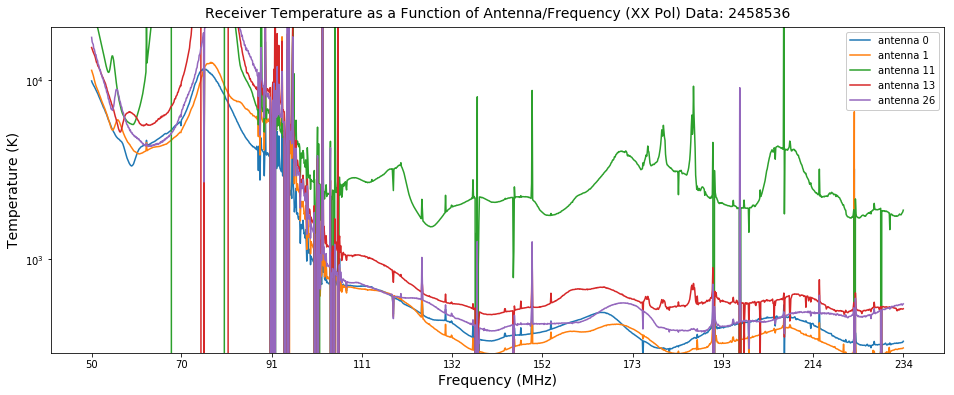

In [51]:
plt.figure(figsize = (16,6))

pol = 'N'

plt.plot(data_8536.Trxr[(0,pol)],label='antenna 0')
plt.plot(data_8536.Trxr[(1,pol)],label='antenna 1')
plt.plot(data_8536.Trxr[(11,pol)],label='antenna 11')
plt.plot(data_8536.Trxr[(13,pol)],label='antenna 13')
plt.plot(data_8536.Trxr[(26,pol)],label='antenna 26')
plt.ylim([3e2,2e4])
plt.yscale('symlog')

plt.legend(loc = 'best', framealpha = 1)

x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))

plt.title('Receiver Temperature as a Function of Antenna/Frequency (XX Pol) Data: 2458536',size=14,verticalalignment='bottom')
plt.xlabel('Frequency (MHz)',size=14)
plt.ylabel('Temperature (K)',size=14)


plt.show()

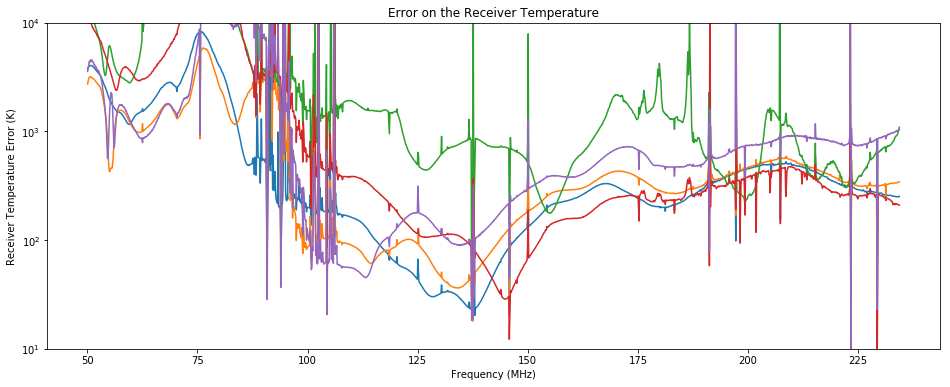

In [53]:
plt.figure(figsize = (16,6))
plt.plot(data_8536.freqs, data_8536.Trxr_err[(0,pol)],label='antenna 0')
plt.plot(data_8536.freqs, data_8536.Trxr_err[(1,pol)],label='antenna 1')
plt.plot(data_8536.freqs, data_8536.Trxr_err[(11,pol)],label='antenna 11')
plt.plot(data_8536.freqs, data_8536.Trxr_err[(13,pol)],label='antenna 13')
plt.plot(data_8536.freqs, data_8536.Trxr_err[(26,pol)],label='antenna 26')
plt.ylim([10,1e4])
plt.yscale('symlog')
plt.ylabel('Receiver Temperature Error (K)')
plt.xlabel('Frequency (MHz)')
plt.title('Error on the Receiver Temperature')
plt.show()

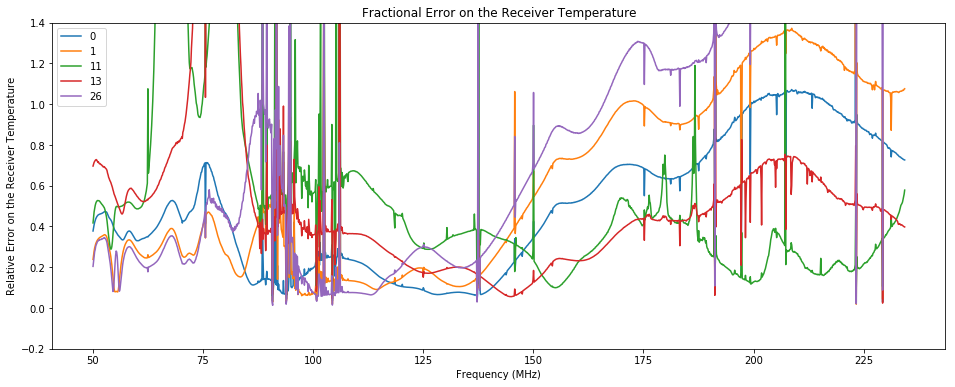

In [56]:
plt.figure(figsize = (16,6))
plt.plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(0,pol)] / data_8536.Trxr[(0,pol)]),label='0')
plt.plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(1,pol)] / data_8536.Trxr[(1,pol)]),label='1')
plt.plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(11,pol)] / data_8536.Trxr[(11,pol)]),label='11')
plt.plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(13,pol)] / data_8536.Trxr[(13,pol)]),label='13')
plt.plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(26,pol)] / data_8536.Trxr[(26,pol)]),label='26')
plt.ylim([-0.2,1.4])
plt.legend()
plt.ylabel('Relative Error on the Receiver Temperature')
plt.xlabel('Frequency (MHz)')
plt.title('Fractional Error on the Receiver Temperature')
plt.show()

In [81]:
fig, axs = plt.subplots(3,1,figsize=(16,16), sharex=True)


axs[0].plot(data_8536.freqs,data_8536.Trxr[(0,pol)],label='antenna 0')
axs[0].plot(data_8536.freqs,data_8536.Trxr[(1,pol)],label='antenna 1')
axs[0].plot(data_8536.freqs,data_8536.Trxr[(11,pol)],label='antenna 11')
axs[0].plot(data_8536.freqs,data_8536.Trxr[(13,pol)],label='antenna 13')
axs[0].plot(data_8536.freqs,data_8536.Trxr[(26,pol)],label='antenna 26')
axs[0].set_ylim([2e2,2e4])
axs[0].set_yscale('symlog')
axs[0].legend(loc = 'best', framealpha = 1)
axs[0].set_title('Receiver Temperature')
axs[0].grid()


axs[1].plot(data_8536.freqs, data_8536.Trxr_err[(0,pol)],label='antenna 0')
axs[1].plot(data_8536.freqs, data_8536.Trxr_err[(1,pol)],label='antenna 1')
axs[1].plot(data_8536.freqs, data_8536.Trxr_err[(11,pol)],label='antenna 11')
axs[1].plot(data_8536.freqs, data_8536.Trxr_err[(13,pol)],label='antenna 13')
axs[1].plot(data_8536.freqs, data_8536.Trxr_err[(26,pol)],label='antenna 26')
axs[1].set_ylim([10,1e4])
axs[1].set_yscale('symlog')
axs[1].set_ylabel('Receiver Temperature Error (K)')
axs[1].set_title('Receiver Temperature Errors')
axs[1].grid()

axs[2].plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(0,pol)] / data_8536.Trxr[(0,pol)]),label='0')
axs[2].plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(1,pol)] / data_8536.Trxr[(1,pol)]),label='1')
axs[2].plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(11,pol)] / data_8536.Trxr[(11,pol)]),label='11')
axs[2].plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(13,pol)] / data_8536.Trxr[(13,pol)]),label='13')
axs[2].plot(data_8536.freqs, np.abs(data_8536.Trxr_err[(26,pol)] / data_8536.Trxr[(26,pol)]),label='26')
axs[2].set_ylim([-0.2,1.4])
axs[2].legend()
axs[2].set_ylabel('Relative Error on the Receiver Temperature')
axs[2].set_title('Fractional Errors on Receiver Temperature')
axs[2].grid()


plt.subplots_adjust(hspace=0.2)

plt.savefig('/data4/tcox/rxr_temp_2458536.png', dpi=200)

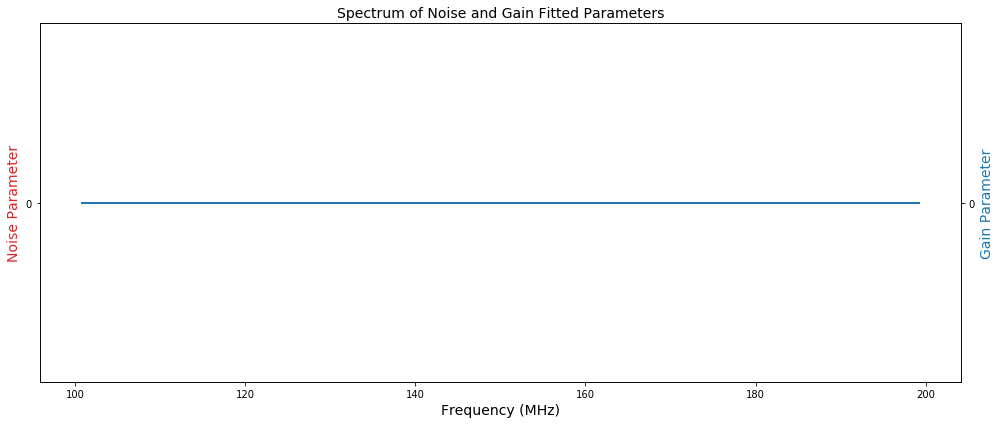

In [19]:

fig, ax1 = plt.subplots()

fig.set_figheight(6)
fig.set_figwidth(14)

ax2 = ax1.twinx()

for ant, pol in data_8536.Trxr.keys():
    
    if pol == 'E':
        
        color = 'tab:red'

        ax1.plot(data_8536.freqs, (data_8536.Trxr[(ant, pol)]+data_8536.Tsky_mean[0,:])*data_8536.gains[(ant, pol)],label='antenna 0',color = color)
        

        color = 'tab:blue'

        ax2.plot(data_8536.freqs, data_8536.gains[(ant, pol)], label='antenna 0', color = color)
        
ax2.tick_params(axis='y')
ax2.set_yscale('symlog')
ax2.set_ylabel('Gain Parameter',size = 14,color='tab:blue')

ax1.set_title('Spectrum of Noise and Gain Fitted Parameters',size=14)
ax1.set_ylabel('Noise Parameter',size=14,color='tab:red')
ax1.set_xlabel('Frequency (MHz)',size = 14)
ax1.tick_params(axis='y')
ax1.set_yscale('symlog')

fig.tight_layout()
plt.show()



# Attempting to Plot in Temperature Units

In [61]:

uv_diff = UVData()

file_list = list(np.sort(glob.glob('2458536/zen.2458536.*.diff.uvh5')))


In [62]:
uv_diff.read(file_list)

In [75]:

uv_temp = uv_diff.get_data(0,0,'xx')[:,26:] / data_8536.gains[(0,'E')]


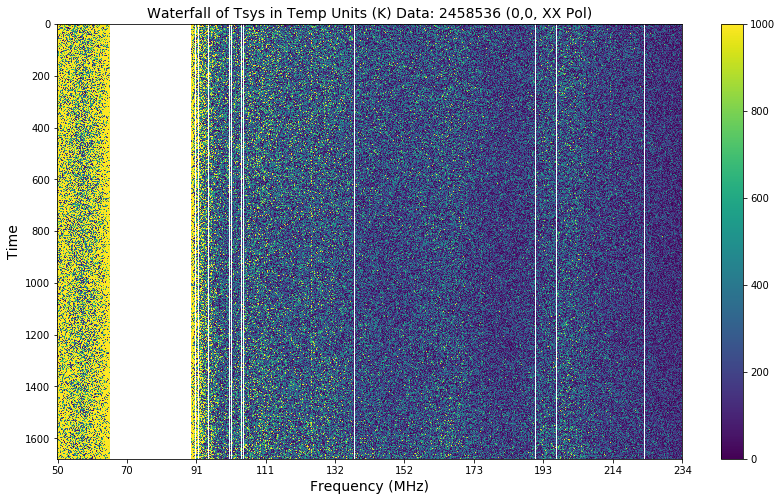

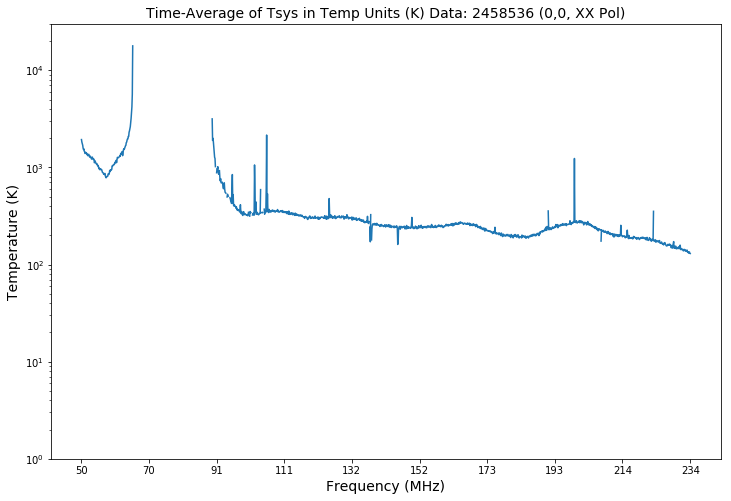

In [123]:

plt.figure(figsize=(14,8))
plt.imshow(np.abs(uv_temp), aspect='auto', vmax=1e3)
plt.title('Waterfall of Tsys in Temp Units (K) Data: 2458536 (0,0, XX Pol)',size=14)
plt.ylabel('Time',size=14)
plt.xlabel('Frequency (MHz)',size=14)
x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))
plt.colorbar()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(np.mean(np.abs(uv_temp),axis=0))
plt.title('Time-Average of Tsys in Temp Units (K) Data: 2458536 (0,0, XX Pol)',size=14)
plt.ylabel('Temperature (K)',size=14)
plt.xlabel('Frequency (MHz)',size=14)
x_ticks = np.linspace(0,1509,num=10,dtype=int)
plt.xticks(x_ticks,(np.around(data_8536.uv.freq_array[0,x_ticks]*1e-6)).astype(int))
plt.yscale('log')
plt.ylim([1e0,3e4])
plt.show()
